# 向量

R 语言最基本的数据类型是向量

本节会关注以下话题：

- **循环补齐**
- **筛选**
- **向量化**

## 标量、向量、数组与矩阵

R 语言中变量类型被称为模式 (mode)。
同一向量中的所有元素必须是相同的模式。

### 添加或删除向量元素

R 语言中向量是连续存储的，不能插入或删除数据。

> 注：类似 C++ 中的 `std::array`，在创建时就已经确定数组大小，后续无法修改大小

插入和删除数据实际上是对变量重新赋值

注：插入删除数据会生成新的向量

In [1]:
x <- c(88, 5, 12, 13)
x <- c(x[1:3], 168, x[4])
print(x)

[1]  88   5  12 168  13


注：可以将 x 看成类似 C 语言中的指针

### 获取向量长度

使用 `length()` 函数

In [2]:
x <- c(1, 2, 4)
print(length(x))

[1] 3


获取第一个 1 所在位置的索引（不一定有效率）

In [3]:
first1 <- function(x) {
    for (i in 1:length(x)) {
        if (x[i] == 1) break
    }
    return(i)
}

In [4]:
print(first1(c(12, 13, 1, 3, 4)))

[1] 3


R 语言中，`1:n` 返回从 1 到 n 的向量，类似 Python 中的 `range` 函数。

但 `first1` 不能处理 `x` 为空的情况

代码

```R
print(first1(c()))
```

会抛出下面的异常

```
Error in if (x[i] == 1) break: 参数长度为零
Traceback:

1. print(first1(c()))
2. first1(c())
```

In [5]:
x <- c()
print(x)

NULL


In [6]:
print(length(x))

[1] 0


In [7]:
print(1: length(x))

[1] 1 0


当 `x` 为空时，`1:length(x)` 返回值是 `1 0` 二元向量。

注：在 Python 中 `list(range(1, 0))` 返回的是空列表。

### 作为向量的矩阵和数组

数组和矩阵实际上都是向量，只不过有额外的类属性。

本节介绍的一切内容，同样适用于矩阵和数组。

In [8]:
m <- rbind(
    c(1, 2, 3),
    c(4, 5, 6)
)
print(m)

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6


In [9]:
print(m + 1:6)

     [,1] [,2] [,3]
[1,]    2    5    8
[2,]    6    9   12


上面的加法实际上就是两个向量相加

注：后续章节会介绍矩阵是按列存储的向量

## 声明

与 Python 一样，R 语言不需要声明变量。
但引用向量中的特定元素前，必须事先创建该对象。

直接执行下面代码会出错

```R
y[1] <- 5
y[2] <- 6
```

我们需要首先创建长度为 2 的空向量，才能完成赋值。

使用 `vector()` 函数创建空向量

In [10]:
y <- vector(length=2)
print(y)

[1] FALSE FALSE


In [11]:
y[1] <- 5
print(y)

[1] 5 0


In [12]:
y[2] <- 12
print(y)

[1]  5 12


如果使用新类型的值赋值给某个元素，整个向量的类型也会自动改变（注：可能是生成了新的对象？）

In [13]:
y[1] <- "a"
print(y)

[1] "a"  "12"


类似 `x` 和 `y` 等变量只是对实际对象的绑定，本身没有类型限制，可以绑定任意类型

In [14]:
x <- c(1, 5)
print(mode(x))

[1] "numeric"


In [15]:
x <- "abc"
print(mode(x))

[1] "character"


## 循环补齐

两个向量使用运算符时，如果要求两个向量具有相同的长度，R 会自动循环补齐 (recycle)，即重复较短的向量，直到它与另一个向量长度相匹配。

In [16]:
print(c(1, 2, 4) + c(6, 0, 9, 20, 22))

Warning message in c(1, 2, 4) + c(6, 0, 9, 20, 22):
"长的对象长度不是短的对象长度的整倍数"


[1]  7  2 13 21 24


上面计算以如下方式执行

In [17]:
print(c(1, 2, 4, 1, 2) + c(6, 0, 9, 20, 22))

[1]  7  2 13 21 24


注：numpy 中的广播机制好像只针对不同维度，无法实现上面运算。可以用 `numpy.resize` 模拟循环补齐效果。

下面是矩阵的例子

In [18]:
x <- cbind(
    c(1, 2, 3),
    c(4, 5, 6)
)
print(x)

     [,1] [,2]
[1,]    1    4
[2,]    2    5
[3,]    3    6


In [19]:
print(x + c(1, 2))

     [,1] [,2]
[1,]    2    6
[2,]    4    6
[3,]    4    8


矩阵是按列排序的向量，所以加号右边的向量被补齐到矩阵元素的个数

In [20]:
print(x + c(1, 2, 1, 2, 1, 2))

     [,1] [,2]
[1,]    2    6
[2,]    4    6
[3,]    4    8


返回的结果同样被表示成矩阵的形式，实际上被补齐的向量在相加前也被转为矩阵形式，即

![](https://cdn.perillaroc.wang/image/blog/2020/r/study/vector/vector-recycle.png)

In [21]:
print(x + cbind(
    c(1, 2, 1),
    c(2, 1, 2)
))

     [,1] [,2]
[1,]    2    6
[2,]    4    6
[3,]    4    8


## 常用的向量运算

### 向量运算和逻辑运算

R 是函数式语言，运算符也是一个函数

In [22]:
print(2 + 3)

[1] 5


In [23]:
print("+"(2, 3))

[1] 5


向量元素加法

In [24]:
x <- c(1, 2, 4)
print(x + c(5, 0, -1))

[1] 6 2 3


向量元素乘法

In [25]:
print(x * c(5, 0, -1))

[1]  5  0 -4


其他元素运算

In [26]:
x <- c(1, 2, 4)
print(x / c(5, 4, -1))

[1]  0.2  0.5 -4.0


In [27]:
print(x %% c(5, 4, -1))

[1] 1 2 0


### 向量索引

向量1[向量2]

In [28]:
y <- c(1.2, 3.9, 0.4, 0.12)
print(y[c(1, 3)])

[1] 1.2 0.4


In [29]:
print(y[2:3])

[1] 3.9 0.4


In [30]:
v <- 3:4
print(y[v])

[1] 0.40 0.12


元素可以重复

In [31]:
x <- c(4, 2, 17, 5)
print(y <- x[c(1, 1, 3)])

[1]  4  4 17


**负数下标代表把相应的元素剔除**

注：Python 中负数下标表示反向索引

In [32]:
z <- c(5, 12, 13)
print(z[-1])

[1] 12 13


In [33]:
print(z[-1:-2])

[1] 13


选择除最后一个元素外的其余元素

In [34]:
z <- c(5, 12, 13)
print(z[1:(length(z)-1)])

[1]  5 12


In [35]:
print(z[-length(z)])

[1]  5 12


### 用 `:` 运算符创建向量

In [36]:
print(5:8)

[1] 5 6 7 8


In [37]:
print(5:1)

[1] 5 4 3 2 1


运算符优先级

注意：`?Syntax` 可以查看运算符优先级

In [194]:
i <- 2
print(1:i-1)

[1] 0 1


In [39]:
print(1:(i-1))

[1] 1


### 使用 `seq()` 创建向量

In [40]:
print(seq(from=12, to=30, by=3))

[1] 12 15 18 21 24 27 30


注：与 Python 中不同，`seq` 包含区间结尾

In [41]:
print(seq(from=1.1, to=2, length=10))

 [1] 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0


`seq` 可以处理空向量

In [42]:
x <- c(5, 12, 13)
print(x)

[1]  5 12 13


In [43]:
print(seq(x))

[1] 1 2 3


In [44]:
x <- NULL
print(x)

NULL


In [45]:
print(seq(x))

integer(0)


### 使用 `rep()` 重复向量常数

`rep` (repeat) 将同一向量重复放到长向量中

In [46]:
x <- rep(8, 4)
print(x)

[1] 8 8 8 8


In [47]:
print(rep(c(5, 12, 13), 3))

[1]  5 12 13  5 12 13  5 12 13


In [48]:
print(rep(1:3, 2))

[1] 1 2 3 1 2 3


`rep()` 函数的 `each` 参数指定交替重复的次数

In [49]:
print(rep(c(5, 12, 13), each=2))

[1]  5  5 12 12 13 13


## 使用 `all()` 和 `any()`

`any()` 参数是否至少一个为 TRUE

`all()` 参数是否全部为 TRUE

In [50]:
x <- 1:10
print(any(x > 8))

[1] TRUE


In [51]:
print(all(x > 88))

[1] FALSE


In [52]:
print(all(x > 0))

[1] TRUE


`any` 或 `all` 函数执行两步操作。

- 计算表达式，得到 bool 向量
- 判断向量中是否有 TRUE 或全部为 TRUE

In [53]:
flag <- (x > 8)
print(flag)

 [1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE


In [54]:
print(any(flag))

[1] TRUE


### 扩展案例：寻找连续出现 1 的游程

在 0，1 组成的序列中，一个由连续的 0 或 1 构成的串称为一个游程 (run)

In [55]:
findruns <- function(x, k) {
    n <- length(x)
    runs <- NULL
    for (i in 1:(n-k+1)) {
        if (all(x[i:(i+k-1)]==1)) {
            runs <- c(runs, i)
        }
    }
    return(runs)
}

In [56]:
y <- c(1, 0, 0, 1, 1, 1, 0, 1, 1)
print(findruns(y, 3))

[1] 4


In [57]:
print(findruns(y, 2))

[1] 4 5 8


In [58]:
print(findruns(y, 4))

NULL


上述代码中，每次更新 `runs` 向量执行的 `runs <- c(runs, i)` 都会创建新的向量，分配内存空间。
对于大型数据集，执行太多次可能会拖慢运行速度。

一种解决方法是预先分配内存空间，在返回时“删掉”不需要的元素

In [59]:
findruns1 <- function(x, k) {
    n <- length(x)
    runs <- vector(length=n)
    count <- 0
    for (i in 1:(n-k+1)) {
        if (all(x[i:i+k-1] == 1)) {
            count <- count + 1
            runs[count] <- i
        }
    }
    if (count > 0) {
        runs <- runs[1:count]
    } else {
        runs <- NULL
    }
    return(runs)
}

使用 1,000,000 个数据进行测试，可以发现 `findruns1` 函数速度提升很明显

In [60]:
w <- round(runif(1000000, min=0, max=1))

In [61]:
system.time(findruns(w, 3))

   user  system elapsed 
  15.01    4.16   19.17 

In [62]:
system.time(findruns1(w, 3))

   user  system elapsed 
   0.47    0.00    0.47 

### 扩展案例：预测离散值时间序列

1 代表有雨，0 代表无雨。假设有一个 k 值，根据最近 k 天的记录预测明天是否会下雨。
采用“过半数规则”(majority rule)，如果最近 k 个数据中 1 的个数大于等于 k/2，则预测下一个值为 1，否则为 0。

构造一个 500 个数据的随机数组

In [196]:
rains <- round(runif(500, min=0, max=1))
print(rains[1:10])

 [1] 0 0 1 0 0 0 1 0 0 1


编写第一个函数

In [199]:
preda <- function(x, k) {
    n <- length(x)
    k2 <- k/2
    pred <- vector(length=n-k)
    for (i in 1:(n-k)) {
        if (sum(x[i:(i+k-1)]) >= k/2 ) {
            pred[i] <- 1
        } else {
            pred[i] <- 0
        }
    }
    return(mean(abs(pred-x[(k+1):n])))
}

该函数返回的是 MAE (Mean Absolute Error)

使用 k=1, 2, 4 测试

In [200]:
print(preda(rains, 1))

[1] 0.5410822


In [201]:
print(preda(rains, 2))

[1] 0.4959839


In [202]:
print(preda(rains, 4))

[1] 0.5


上面的函数每个循环都会计算整个子序列的和。相邻两个子序列仅开头和结尾数据不同。

编写函数，重复利用上一步的计算结果。每次循环只执行一次加法和一次减法

In [203]:
predb <- function(x, k) {
    n <- length(x)
    k2 <- k/2
    pred <- vector(length=n-k)
    sm <- sum(x[1:k])
    if (sm > k2) pred[1] <- 1 else pred[1] <- 0
    if (n - k >= 2) {
        for (i in 2:(n - k)) {
            sm <- sm + x[i+k-1] - x[i-1]
            if (sm > k2) pred[i] <- 1 else pred[i] <- 0 
        }
    }
    return(mean(abs(pred-x[(k+1):n])))
}

In [204]:
print(preda(rains, 4))

[1] 0.5


另一种方法是使用累加和 `cumsum()` 函数代替 `sum` 求和

In [205]:
y <- c(5, 2, -3, 8)
print(cumsum(y))

[1]  5  7  4 12


编写函数，每次循环中仅使用一次减法

In [206]:
predc <- function(x, k) {
    n <- length(x)
    k2 <- k/2
    pred <- vector(length=n-k)
    csx <- c(0, cumsum(x))
    for (i in 1:(n-k)) {
        if (csx[i+k] - csx[i] >= k2) {
            pred[i] <- 1
        } else {
            pred[i] <- 0
        }
    }
    return(mean(abs(pred-x[(k+1):n])))
}

In [207]:
print(preda(rains, 4))

[1] 0.5


测试下几种方法的耗时

In [208]:
long.rains <- round(runif(1000000, min=0, max=1))

In [209]:
system.time(preda(long.rains, 10))

   user  system elapsed 
   0.79    0.00    0.79 

In [210]:
system.time(predb(long.rains, 10))

   user  system elapsed 
   0.17    0.01    0.18 

In [211]:
system.time(predc(long.rains, 10))

   user  system elapsed 
   0.14    0.00    0.14 

## 向量化运算符

提高 R 代码执行效率的有效方法之一就是向量化 (vectorize)，即应用到向量上的函数实际上是应用到向量的每一个元素上。

### 向量输入、向量输出

In [77]:
u <- c(5, 2, 8)
v <- c(1, 3, 9)
print(u > v)

[1]  TRUE FALSE FALSE


如果一个函数使用向量化的运算符，那么它也被向量化了，从而使速度提升成为可能。

In [78]:
w <- function(x) return(x+1)
print(w(u))

[1] 6 3 9


超越函数也是向量化的

In [79]:
print(sqrt(1:9))

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
[9] 3.000000


许多内置 R 函数都是向量化的

In [80]:
y <- c(1.2, 3.9, 0.4)
z <- round(y)
print(z)

[1] 1 4 0


In [81]:
print(round(1.2))

[1] 1


`+` 也是函数

In [82]:
y <- c(12, 5, 13)
print(y + 4)

[1] 16  9 17


In [83]:
print('+'(y, 4))

[1] 16  9 17


R 对向量的循环补齐可能会给期望使用标量的函数带来问题

In [84]:
f <- function(x, c) {
    return ((x+c)^2)
}

In [85]:
print(f(1:3, 0))

[1] 1 4 9


In [86]:
print(f(1:3, 1))

[1]  4  9 16


参数 `c` 也可以接收多元向量

In [87]:
print(f(1:3, 1:3))

[1]  4 16 36


想将 `c` 限制为标量，需要加入判断语句

In [213]:
f <- function(x, c) {
    if (length(c) != 1) stop("vector c not allowed")
    return ((x+c)^2)
}

再次执行上面的语句

```R
print(f(1:3, 1:3))
```

会抛出错误

```
Error in f(1:3, 1:3): vector c not allowed
Traceback:

1. print(f(1:3, 1:3))
2. f(1:3, 1:3)
3. stop("vector c not allowed")   # at line 2 of file <text>
```

### 向量输入，矩阵输出

In [89]:
z12 <- function(z) return(c(z, z^2))

In [90]:
print(z12(5))

[1]  5 25


In [91]:
x <- 1:8
print(z12(x))

 [1]  1  2  3  4  5  6  7  8  1  4  9 16 25 36 49 64


以矩阵的形式更好理解，使用 `matrix` 函数将向量转为矩阵

In [92]:
print(matrix(z12(x), ncol=2))

     [,1] [,2]
[1,]    1    1
[2,]    2    4
[3,]    3    9
[4,]    4   16
[5,]    5   25
[6,]    6   36
[7,]    7   49
[8,]    8   64


可以使用 `sapply()` (simple apply) 简化这一步骤。

调用 `sapply(x, f)` 会对 x 中的每一个元素应用 `f()`，并将结果转成矩阵。
每个元素的结果作为一列

In [93]:
print(sapply(1:8, z12))

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8]
[1,]    1    2    3    4    5    6    7    8
[2,]    1    4    9   16   25   36   49   64


## NA 与 NULL 值

NA 表示缺失值

NULL 表示不存在的值

### NA 的使用

统计函数支持跳过 NA 值

注：需要手动指定参数

In [94]:
x <- c(88, NA, 12, 168, 13)
print(x)

[1]  88  NA  12 168  13


In [95]:
print(mean(x))

[1] NA


In [96]:
print(mean(x, na.rm=T))

[1] 70.25


R 会自动跳过 NULL 值

In [97]:
x <- c(88, NULL, 12, 168, 13)
print(x)

[1]  88  12 168  13


In [98]:
print(mean(x))

[1] 70.25


`NA` 的模式与向量中其它元素保持一致

In [99]:
x <- c(5, NA, 12)
print(mode(x[1]))

[1] "numeric"


In [100]:
print(mode(x[2]))

[1] "numeric"


In [101]:
y <- c("abc", "def", NA)
print(mode(y[2]))

[1] "character"


In [102]:
print(mode(y[3]))

[1] "character"


### NULL 的使用

NULL 是 R 的一种特殊对象，没有模式

注：NULL 可以当成一种空指针

In [103]:
z <- NULL
for (i in 1:10) {
    if (i %% 2 == 0) {
        z <- c(z, i)
    }
}
print(z)

[1]  2  4  6  8 10


使用 `seq` 也可以实现上面的功能

In [104]:
print(seq(2, 10, 2))

[1]  2  4  6  8 10


或者另一种方法

In [105]:
print(2*1:5)

[1]  2  4  6  8 10


如果将上例中的 NULL 换成 NA，则不会得到想要的结果

In [106]:
z <- NA
for (i in 1:10) {
    if (i %% 2 == 0) {
        z <- c(z, i)
    }
}
print(z)

[1] NA  2  4  6  8 10


下面的示例可以看到，NULL 被当成不存在

In [107]:
u <- NULL
print(length(u))

[1] 0


In [108]:
v <- NA
print(length(v))

[1] 1


## 筛选

筛选 (filtering) 使我们可以提取向量中满足一定条件的元素

### 生成筛选索引

一个简单的示例

In [109]:
z <- c(5, 2, -3, 8)
w <- z[z*z > 8]
print(w)

[1]  5 -3  8


逐步研究筛选如何实现

In [110]:
z <- c(5, 2, -3, 8)
print(z)

[1]  5  2 -3  8


In [111]:
print(z*z > 8)

[1]  TRUE FALSE  TRUE  TRUE


注意：`*` 和 `>` 都是向量运算符，`z` 和 `8` 都是向量

所以上式又可以写成

In [112]:
print(">"("*"(z, z), 8))

[1]  TRUE FALSE  TRUE  TRUE


返回的结果是布尔值向量，用布尔值向量实现筛选

In [113]:
print(z[c(TRUE, FALSE, TRUE, TRUE)])

[1]  5 -3  8


注：numpy 中也有类似的筛选操作

筛选可以用于其它向量

In [114]:
z <- c(5, 2, -3, 8)
j <- z*z > 8
print(j)

[1]  TRUE FALSE  TRUE  TRUE


In [115]:
y <- c(1, 2, 30, 5)
print(y[j])

[1]  1 30  5


或者写成更简洁的形式

In [116]:
z <- c(5, 2, -3, 8)
y <- c(1, 2, 30, 5)
print(y[z*z > 8])

[1]  1 30  5


### 使用 `subset` 函数筛选

`subset` 与普通筛选类似，但会忽略 NA 值

In [118]:
x <- c(6, 1:3, NA, 12)
print(x)

[1]  6  1  2  3 NA 12


In [119]:
print(x[x > 5])

[1]  6 NA 12


In [120]:
print(subset(x, x > 5))

[1]  6 12


### 选择函数 `which()`

`which()` 返回满足条件元素所在的位置

In [121]:
z <- c(5, 2, -3, 8)
print(which(z*z > 8))

[1] 1 3 4


了解 `which` 如何工作

In [123]:
print(z * z > 8)

[1]  TRUE FALSE  TRUE  TRUE


`which()` 函数报告向量中哪些元素为 `TRUE`。

下面考虑一个简单的函数：找到满足一定条件的元素首次出现的位置。

上一篇文章中使用 `for` 循环查找

In [125]:
first1 <- function(x) {
    for (i in 1:length(x)) {
        if (x[i] == 1) {
            break
        }
    }
    return(i)
}

使用 `which` 的版本

注意：这里找出所有的 1，实际上仅需要找到第一个 1

In [126]:
first1a <- function(x) return(which(x == 1)[1])

## 向量化的 `ifelse()` 函数

if 语句的向量化版本：`ifelse(b, u, v)`

如果 `b[i]` 为真，第 i 个元素为 `u[i]`，否则为 `v[i]`。

In [127]:
x <- 1:10
y <- ifelse(x %% 2 == 0, 5 ,12)
print(y)

 [1] 12  5 12  5 12  5 12  5 12  5


In [128]:
x <- c(5, 2, 9, 12)
print(ifelse(x > 6, 2 * x, 3 * x))

[1] 15  6 18 24


### 扩展案例：度量相关性

向量 x 和 y 是时间序列变量，比如是温度和气压的观测值。
定义两者的相关性为 x 和 y 同时上升或下降次数占观测数的比例。
即 `y[i+1] - y[i]` 与 `x[i+1] - x[i]` 符号相同时的次数占总数 i 的比例。

In [134]:
findud <- function(v) {
    vud <- v[-1] - v[-length(v)]
    return (ifelse(vud >0, 1, -1))
}

示例

In [135]:
print(findud(c(5, 12, 13, 3, 6, 0, 1, 15, 16, 8, 88)))

 [1]  1  1 -1  1 -1  1  1  1 -1  1


`udcorr` 计算相关性

In [136]:
udcorr <- function(x, y) {
    ud <- lapply(list(x, y), findud)
    return (mean(ud[[1]]==ud[[2]]))
}

示例

In [137]:
x <- c(5, 12, 13, 3, 6, 0, 1, 15, 16, 8, 88)
y <- c(4, 2, 3, 23, 6, 10, 11, 12, 6, 3, 2)
print(udcorr(x, y))

[1] 0.4


其中 `lapply()` 返回一个列表

注意：R 语言中的列表类似 Python 中的字典

In [139]:
print(lapply(list(x, y), findud))

[[1]]
 [1]  1  1 -1  1 -1  1  1  1 -1  1

[[2]]
 [1] -1  1  1 -1  1  1  1 -1 -1 -1



更高级的版本使用 `diff` 函数，对向量做“滞后”运算，默认滞后一个元素，即与前一个元素做差

In [142]:
u <- c(1, 6, 7, 2, 3, 5)
print(diff(u))

[1]  5  1 -5  1  2


`sign` 函数根据数值正负返回 1, 0 或 -1

In [143]:
u <- c(1, 6, 7, 2, 3, 5)
print(diff(u))
print(sign(diff(u)))

[1]  5  1 -5  1  2
[1]  1  1 -1  1  1


使用上面两个函数，可以将 `udcorr` 函数写为一行

In [144]:
udcorr <- function(x, y) mean(sign(diff(x)) == sign(diff(y)))

测试

In [145]:
x <- c(5, 12, 13, 3, 6, 0, 1, 15, 16, 8, 88)
y <- c(4, 2, 3, 23, 6, 10, 11, 12, 6, 3, 2)
print(udcorr(x, y))

[1] 0.4


### 扩展案例：对鲍鱼数据集重新编码

`ifelse` 可以嵌套使用。

在鲍鱼数据集中，性别被编码为 M，F 或 I (Infant，表示幼虫)。

假设少量样本的性别被保存在 g 中，将字符变量重新编码为 0, 1, 2

In [147]:
g <- c("M", "F", "F", "I", "M", "M", "F")
print(ifelse(g == "M", 1, ifelse(g == "F", 2, 3)))

[1] 1 2 2 3 1 1 2


使用 `args` 参数查看形式参数名字

In [148]:
args(ifelse)

function (test, yes, no) 
NULL

R 语言使用“惰性求值” (lazy evaluation)，只有当需要时表达式才会被计算，否则不计算。

这意味着上述两重 ifelse 不是对全部数据都进行两次计算，而是只有对第一次计算为 FALSE 的值，才会进行第二次计算。

可以使用 `which` 寻找不同性别数据的编号

In [149]:
m <- which(g == "M")
print(m)

[1] 1 5 6


In [151]:
f <- which(g == "F")
print(f)

[1] 2 3 7


In [152]:
i <- which(g == "I")
print(i)

[1] 4


可以将这些子集保存到列表中

注意：`for` 循环支持字符串向量

In [154]:
grps <- list()
for (gen in c("M", "F", "I")) {
    grps[[gen]] <- which(g == gen)
}
print(grps)

$M
[1] 1 5 6

$F
[1] 2 3 7

$I
[1] 4



为鲍鱼数据集添加表头

In [155]:
title <- c("Gender", "Length", "Diameter", "Height", "WholeWt", "ShuckedWt", "ViscWt", "ShellWt", "Rings")

使用 `read.csv` 载入数据集

In [162]:
aba <- read.csv(
    "Abalone.data",
    header=FALSE,
    col.names=title,
    as.is=TRUE
)
print(head(aba))

  Gender Length Diameter Height WholeWt ShuckedWt ViscWt ShellWt Rings
1      M  0.455    0.365  0.095  0.5140    0.2245 0.1010   0.150    15
2      M  0.350    0.265  0.090  0.2255    0.0995 0.0485   0.070     7
3      F  0.530    0.420  0.135  0.6770    0.2565 0.1415   0.210     9
4      M  0.440    0.365  0.125  0.5160    0.2155 0.1140   0.155    10
5      I  0.330    0.255  0.080  0.2050    0.0895 0.0395   0.055     7
6      I  0.425    0.300  0.095  0.3515    0.1410 0.0775   0.120     8


分雌雄两组，对直径和长度作图

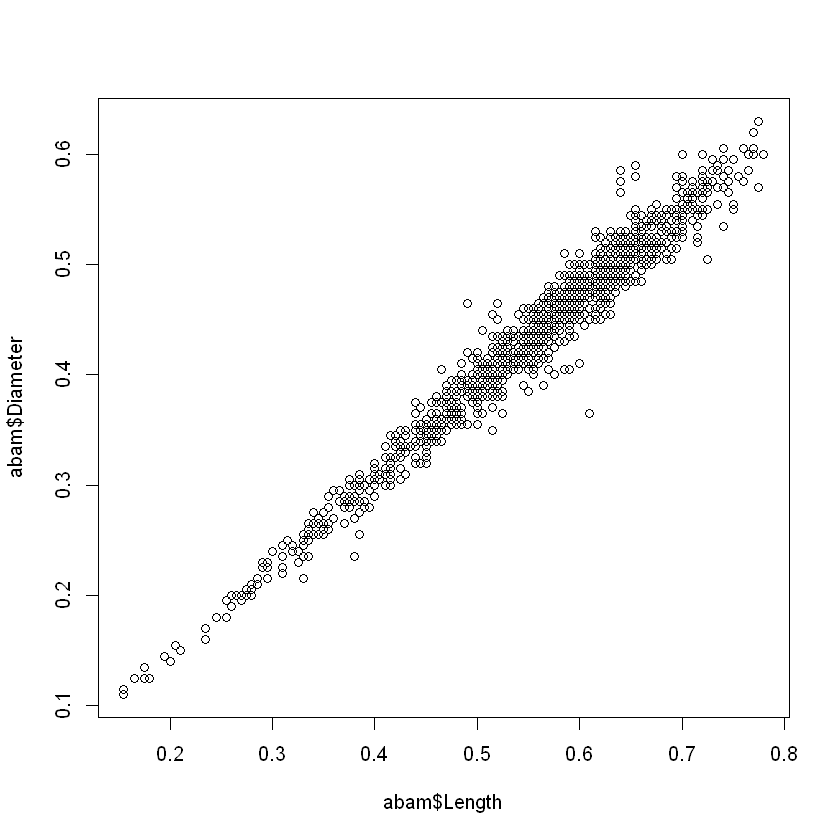

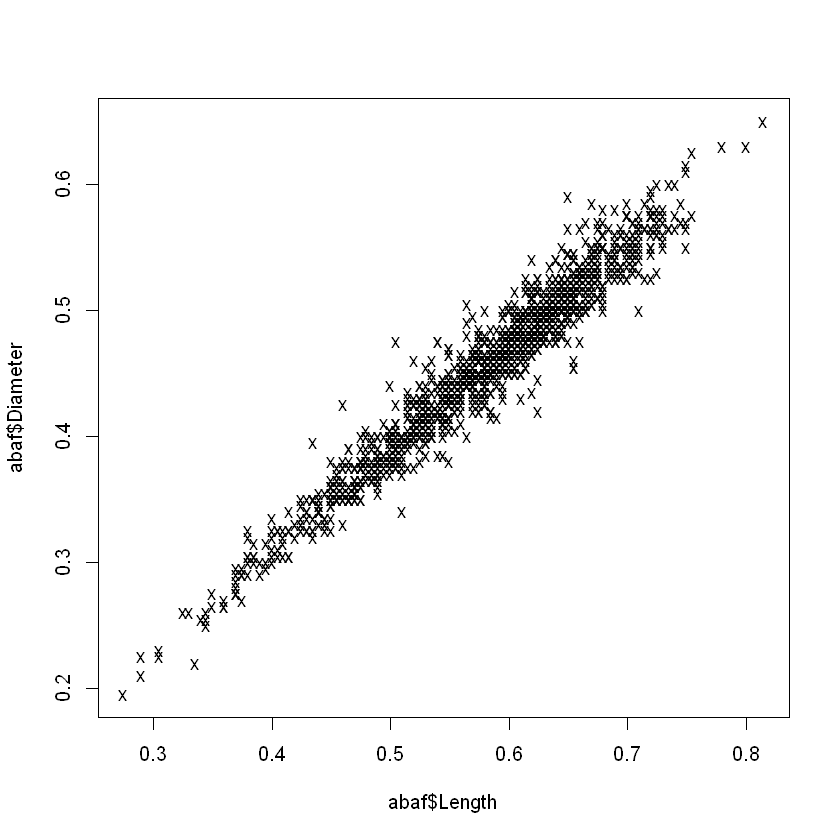

In [165]:
grps <- list()
for (gen in c("M", "F", "I")) {
    grps[[gen]] <- which(aba[,1] == gen)
}
abam <- aba[grps$M,]
abaf <- aba[grps$F,]
plot(abam$Length, abam$Diameter)
plot(abaf$Length, abaf$Diameter, pch="x", new=FALSE)

`pch` 参数可以是向量

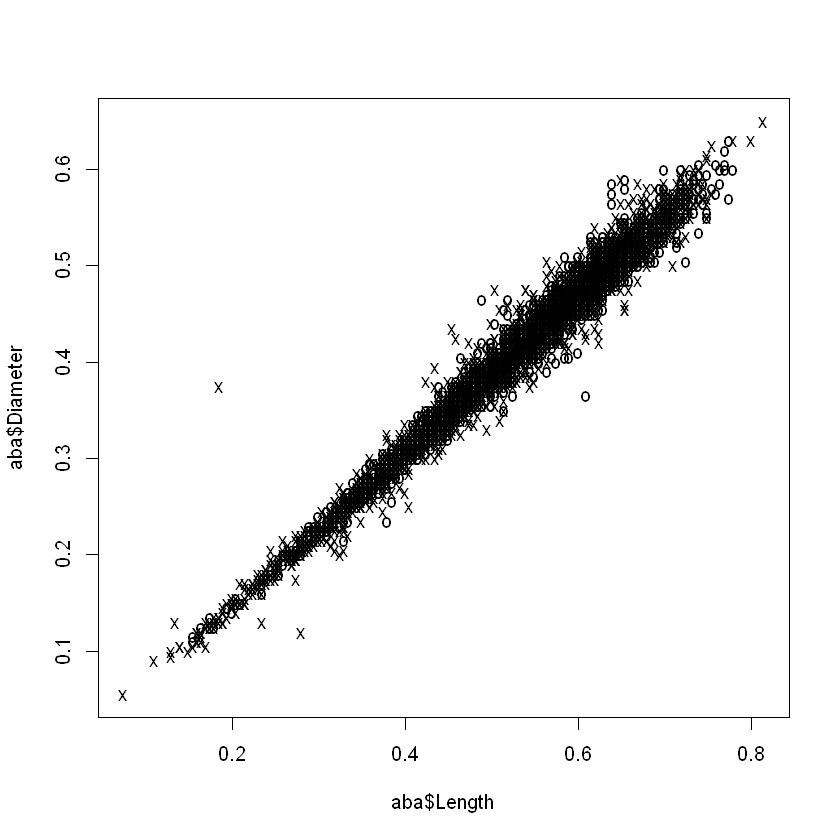

In [167]:
pchvec <- ifelse(aba$Gender == "M", "o", "x")
plot(aba$Length, aba$Diameter, pch=pchvec)

## 测试向量相等

因为 `==` 是向量化函数，使用 `==` 比较两个向量是否相等不会得到预想的结果

In [169]:
x <- 1:3
y <- c(1, 3, 4)
print(x == y)

[1]  TRUE FALSE FALSE


一种可行的方法是结合 `all` 函数使用 `==` 运算符

In [172]:
print(all(x == y))

[1] FALSE


另一种方法是使用 `identical` 函数

In [173]:
print(identical(x, y))

[1] FALSE


`identical` 函数判断两个对象是否完全一致。

下面是一个值得 *思考* 的示例

In [175]:
x <- 1:2
print(x)

[1] 1 2


In [176]:
y <- c(1, 2)
print(y)

[1] 1 2


In [177]:
print(identical(x, y))

[1] FALSE


In [178]:
print(typeof(x))

[1] "integer"


In [179]:
print(typeof(y))

[1] "double"


`:` 产生的是整数，`c()` 产生的是浮点数

## 向量元素的名称

可以给向量元素随意指定名称

In [180]:
x <- c(1, 2, 4)
names(x)

NULL

In [181]:
names(x) <- c("a", "b", "ab")
print(names(x))

[1] "a"  "b"  "ab"


In [182]:
print(x)

 a  b ab 
 1  2  4 


将向量名称赋值为 NULL，可以将其删除

In [183]:
names(x) <- NULL
print(x)

[1] 1 2 4


可以使用名称来引用向量中的元素

In [184]:
x <- c(1, 2, 4)
names(x) <- c("a", "b", "c")
print(x["b"])

b 
2 


注：向量名称可以使用任意值，比如列表

In [189]:
x <- c(1, 2, 4)
names(x) <- list(c(1, 2), "c", TRUE)
print(x)

c(1, 2)       c    TRUE 
      1       2       4 


## 关于 `c()` 的更多内容

`c()` 会自动将不同类型的参数降级为同一类型

In [190]:
print(c(5, 2, "abc"))

[1] "5"   "2"   "abc"


In [191]:
print(c(5, 2, list(a=1, b=4)))

[[1]]
[1] 5

[[2]]
[1] 2

$a
[1] 1

$b
[1] 4



`c()` 对向量有扁平化效果

In [192]:
print(c(5, 2, c(1.5, 6)))

[1] 5.0 2.0 1.5 6.0


注：Python 中类似的操作会生成嵌套列表